In [ ]:
# mount google drive on your runtime using and authorization code.
# more details here: https://colab.research.google.com/notebooks/io.ipynb
from google.colab import drive
drive.mount('/content/drive')
#!pip install tensorflow


Mounted at /content/drive


#Importing libraries and setting random set so we all get same results

In [ ]:

# import libraries
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
import pickle
import cv2
from google.colab.patches import cv2_imshow
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# check GPU is available
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))

# set random seed to be used all over
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
#os.environ['TF_DETERMINISTIC_OPS'] = '1' #deterministic behavior in TensorFlow operations.
tf.keras.utils.set_random_seed(SEED)
tf.compat.v1.set_random_seed(SEED)
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1,log_device_placement =True)
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = config)

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9



#Getting the dataset

In [ ]:
# Path to the directory containing the your project info (Change to your location)
PROJECT_ROOT_DIR = '/content/drive/MyDrive/assignment_0cs4331/'

# Path to the directory containing the dataset
# DOWNLOAD BUSI dataset here: https://scholar.cu.edu.eg/?q=afahmy/pages/dataset
DATA_DIR = 'Dataset_BUSI/Dataset_BUSI_with_GT/'

In [ ]:
# Funciton for loading the dataset
# reference: https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

def load_image():
  # initialize the data and labels for each class
  data = []
  labels = []

  data_aside = []
  labels_aside = []

  benign_data = []
  benign_labels = []

  malignant_data = []
  malignant_labels = []

  normal_data = []
  normal_labels = []

  # load benign image
  for i in range(1,438):
    image = cv2.imread(PROJECT_ROOT_DIR + DATA_DIR + 'benign/' + 'benign (' + str(i) + ').png')
    # resize image to 224 * 224 * 3
    image = cv2.resize(image, (224, 224))
    benign_data.append(image)
    # extract the class label from the image folder
    benign_labels.append('benign')

  for i in range(0,437):
      data.append(benign_data[i])
      labels.append(benign_labels[i])

  # load malignant image
  for i in range(1,211):
    image = cv2.imread(PROJECT_ROOT_DIR + DATA_DIR + 'malignant/' + 'malignant (' + str(i) + ').png')
    # resize image to 224 * 224 * 3
    image = cv2.resize(image, (224, 224))
    malignant_data.append(image)
    # extract the class label from the image folder
    malignant_labels.append('malignant')

  for i in range(0,210):
      data.append(malignant_data[i])
      labels.append(malignant_labels[i])

  # load normal image
  for i in range(1,134):
    image = cv2.imread(PROJECT_ROOT_DIR + DATA_DIR + 'normal/' + 'normal (' + str(i) + ').png')
    # resize image to 224 * 224 * 3
    image = cv2.resize(image, (224, 224))
    normal_data.append(image)
    # extract the class label from the image folder
    normal_labels.append('normal')

  for i in range(0,133):
      data.append(normal_data[i])
      labels.append(normal_labels[i])

  return data, labels
# Function for image preprocessing
def preprocess(data,labels):
  # Save training and test image to numpy, Scale image features to be in [0, 1]
  data = np.array(data, dtype = np.float32) / 255.0
  # Save labels to numpy encode label to integer catergory 0 = 'benign', 1 = 'malignant', 2 = 'normal'
  labels = np.array(labels)
  new_label_encoder = preprocessing.LabelEncoder()
  new_label_encoder.fit(labels)
  targets = new_label_encoder.transform(labels)

  return data, targets


In [ ]:
# # Load the BUSI images and labels
# # This will take time (my time was around 12 min)
# data, labels = load_image()
# data, labels = preprocess(data,labels)

# # split data into 80% train and 20% test, shuffle the data with
# (imgs_train, imgs_test, labels_train, labels_test) = train_test_split(data, labels, test_size = 0.2, random_state=SEED, shuffle = True)
# # split data into 60% train data and 20% validation data
# (imgs_train, imgs_val, labels_train, labels_val) = train_test_split(imgs_train, labels_train, test_size = 0.2, random_state=SEED, shuffle = True)

# Load and preprocess images and labels
data, labels = load_image()
data, labels = preprocess(data, labels)

# Check the shape of the data and labels after loading
print("Data shape: ", np.array(data).shape)
print("Labels shape: ", np.array(labels).shape)

# split data into 80% train and 20% test, shuffle the data
(imgs_train, imgs_test, labels_train, labels_test) = train_test_split(data, labels, test_size=0.2, random_state=SEED, shuffle=True)

# Print shapes to ensure the split was successful
print('Training data shape:', np.array(imgs_train).shape)
print('Test data shape:', np.array(imgs_test).shape)
print('Training labels shape:', np.array(labels_train).shape)
print('Test labels shape:', np.array(labels_test).shape)

# split data into 60% train data and 20% validation data
(imgs_train, imgs_val, labels_train, labels_val) = train_test_split(imgs_train, labels_train, test_size=0.2, random_state=SEED, shuffle=True)

# Print shapes of the training, validation, and test datasets
print('Images train shape: {} - Labels train shape: {}'.format(np.array(imgs_train).shape, np.array(labels_train).shape))
print('Images validation shape: {} - Labels validation shape: {}'.format(np.array(imgs_val).shape, np.array(labels_val).shape))
print('Images test shape: {} - Labels test shape: {}'.format(np.array(imgs_test).shape, np.array(labels_test).shape))





Data shape:  (780, 224, 224, 3)
Labels shape:  (780,)
Training data shape: (624, 224, 224, 3)
Test data shape: (156, 224, 224, 3)
Training labels shape: (624,)
Test labels shape: (156,)
Images train shape: (499, 224, 224, 3) - Labels train shape: (499,)
Images validation shape: (125, 224, 224, 3) - Labels validation shape: (125,)
Images test shape: (156, 224, 224, 3) - Labels test shape: (156,)


In [ ]:
# Display the shapes of train, validation, and test datasets
print('Images train shape: {} - Labels train shape: {}'.format(imgs_train.shape, labels_train.shape))
print('Images validation shape: {} - Labels validation shape: {}'.format(imgs_val.shape, labels_val.shape))
print('Images test shape: {} - Labels test shape: {}'.format(imgs_test.shape, labels_test.shape))


Images train shape: (499, 224, 224, 3) - Labels train shape: (499,)
Images validation shape: (125, 224, 224, 3) - Labels validation shape: (125,)
Images test shape: (156, 224, 224, 3) - Labels test shape: (156,)


# Set constants

In [ ]:
NUM_LABELS = 3                             # Number of labels
BATCH_SIZE = 16                             # Size of batch
HEIGHT = 224                                 # Height of input image
WIDTH = 224                                  # Width of input image
N_CHANNEL = 3                               # Number of channels
OUTPUT_DIM = 3                             # Number of output dimension

# Set training hyperparameters
NUM_EPOCH = 100                             # Number of epoch to train
LR = 0.0001                                 # Learning rate

INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)  # Input shape of model
IMG_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)

# Converting the labels

In [ ]:
from tensorflow import keras
labels_train = keras.utils.to_categorical(labels_train, NUM_LABELS)
labels_test = keras.utils.to_categorical(labels_test, NUM_LABELS)
labels_val = keras.utils.to_categorical(labels_val, NUM_LABELS)






# Task1: Simple CNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5148 - loss: 1.0117 - val_accuracy: 0.5840 - val_loss: 0.9087
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5407 - loss: 0.9634 - val_accuracy: 0.5840 - val_loss: 0.8768
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5658 - loss: 0.9219 - val_accuracy: 0.5920 - val_loss: 0.8325
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5852 - loss: 0.8437 - val_accuracy: 0.5920 - val_loss: 0.8456
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6344 - loss: 0.7960 - val_accuracy: 0.6400 - val_loss: 0.7765
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6748 - loss: 0.6750 - val_accuracy: 0.6640 - val_loss: 0.7980
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7454 - loss: 0.6158 - val_accuracy: 0.6640 - val_loss: 0.7958
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7657 - loss: 0.5441 - val_accuracy: 

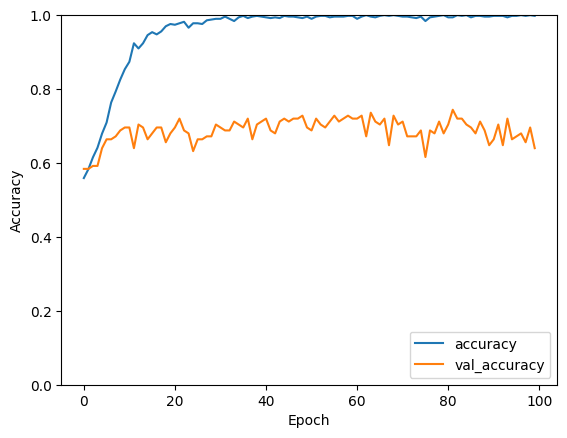

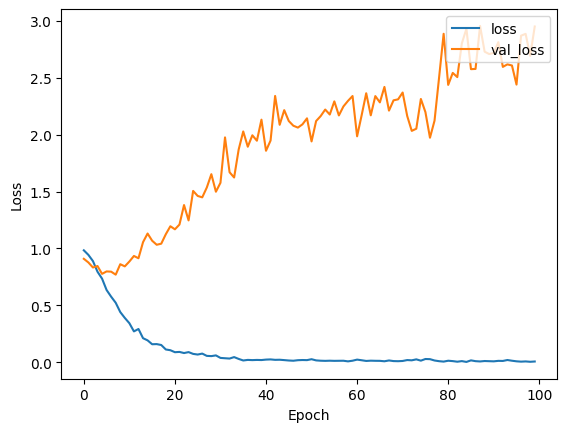

In [ ]:
# For your first task, you will train a Convolutional Natural Network (CCN) model with the parameters in Table 1 and provide us with the results.
# You can use already developed models for Kears, TensorFlow, and PyTorch. You don’t need to implement the models’ layers yourself.
# For this task, you don’t need to do hyper-parameter tuning, apply data augmentation, or fine-tune the layers of the models unless you wish to.
# Here few steps that you could follow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Parameters
NUM_LABELS = 3
BATCH_SIZE = 16
HEIGHT = 224
WIDTH = 224
N_CHANNEL = 3
NUM_EPOCH = 100
LR = 0.0001
INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)
# Normalize the images

#imgs_train = imgs_train
#imgs_val = imgs_val
#imgs_test = imgs_test
# Build your network

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_LABELS, activation='softmax')
])
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(imgs_train, labels_train, epochs=NUM_EPOCH,
                    batch_size=BATCH_SIZE,
                    validation_data=(imgs_val, labels_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(imgs_test, labels_test)
print(f'Test accuracy: {test_acc}')

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
# Save the model
model.save('my_model.h5')





# Task 2: Enhance the performance


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 938ms/step - accuracy: 0.4056 - loss: 1.2956 - val_accuracy: 0.5840 - val_loss: 1.0718 - learning_rate: 1.0000e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.4905 - loss: 1.1772 - val_accuracy: 0.5840 - val_loss: 1.0612 - learning_rate: 1.0000e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.4160 - loss: 1.2682 - val_accuracy: 0.5840 - val_loss: 1.0504 - learning_rate: 1.0000e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.4611 - loss: 1.2142 - val_accuracy: 0.5840 - val_loss: 1.0407 - learning_rate: 1.0000e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.4859 - loss: 1.1821 - val_accuracy: 0.5840 - val_loss: 1.0330 - learning_rate: 1.0000e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.5200 - loss: 1.1016 - val_accuracy: 0.5840 - val_loss: 1.0230 - learning_rate: 1.0000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.57

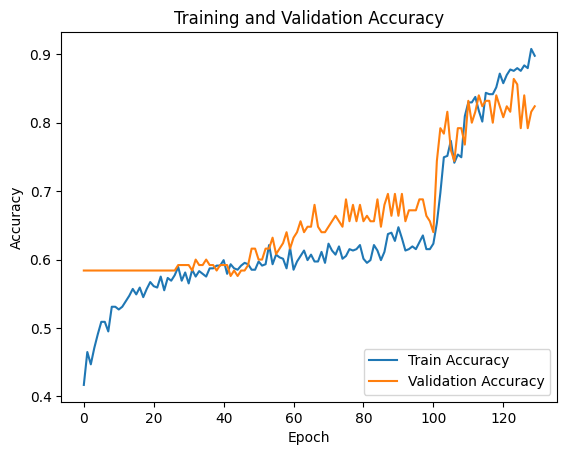

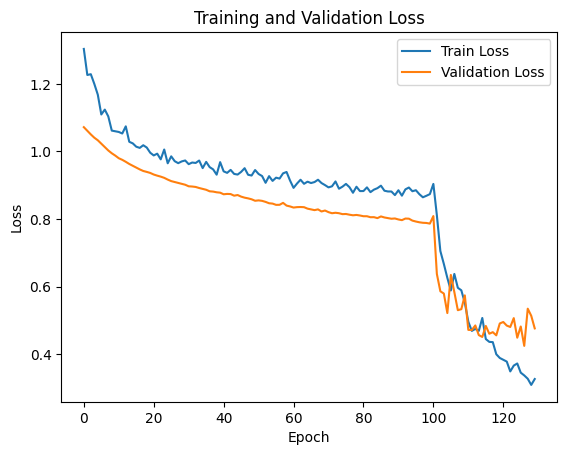

In [ ]:
# CS5331/CS4331 You should Impliment this part
# Task 2 Impliment an enhanced DL performance
# You must train a DL model to achieve 85% or above testing accuracy.
# You are restricted to using the parameters provided in Table 3.
# You should start with pre-trained weights (e.g., on ImageNet, which is already available on Keras). It should result in a better performance.
# Any other hyper-parameter tuning, DL model use, data augmentation, or fine-tuning of the layers of the models is fine as long as you reach the desired accuracy.
# You will need to try at least a couple of parameters to reach the desired accuracy.

# import libraries
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Parameters
NUM_LABELS = 3
BATCH_SIZE = 16
HEIGHT = 224
WIDTH = 224
N_CHANNEL = 3
NUM_EPOCH = 100
LR = 0.0001
INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)

# Initialize data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(imgs_train)  # Assuming imgs_train is your training data

# Load the pretrained VGG16 model without the top layers and include ImageNet weights
base_model = VGG16(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')

# Freeze the base layers initially so that they don't get trained
base_model.trainable = False

# Build the model on top of VGG16, with reduced dense layers
model = models.Sequential([
    base_model,  # Pre-trained VGG16 model as feature extractor
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling2D
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Dense layer with L2 regularization
    layers.Dropout(0.5),  # Dropout for overfitting prevention
    layers.Dense(NUM_LABELS, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks to prevent overfitting and adjust the learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(datagen.flow(imgs_train, labels_train, batch_size=BATCH_SIZE),
                    epochs=NUM_EPOCH,
                    validation_data=(imgs_val, labels_val),
                    callbacks=[early_stopping, lr_scheduler])

# Unfreeze the base model layers for fine-tuning
base_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=optimizers.Adam(learning_rate=LR / 10),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model for a few more epochs
fine_tune_epochs = 30
history_fine = model.fit(datagen.flow(imgs_train, labels_train, batch_size=BATCH_SIZE),
                         epochs=fine_tune_epochs,
                         validation_data=(imgs_val, labels_val),
                         callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(imgs_test, labels_test)
print(f'Test accuracy: {test_acc}')

# Plot accuracy over epochs
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the trained model
model.save('vgg16_finetuned_model.h5')





# Taks 3: Avoiding Overfitting



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.5254 - loss: 1.1779 - val_accuracy: 0.5840 - val_loss: 1.0718 - learning_rate: 1.0000e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.5544 - loss: 1.1505 - val_accuracy: 0.5840 - val_loss: 1.0456 - learning_rate: 1.0000e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.5431 - loss: 1.0942 - val_accuracy: 0.5840 - val_loss: 1.0369 - learning_rate: 1.0000e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5401 - loss: 1.0935 - val_accuracy: 0.5840 - val_loss: 1.0274 - learning_rate: 1.0000e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.5376 - loss: 1.0910 - val_accuracy: 0.5840 - val_loss: 1.0175 - learning_rate: 1.0000e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.5522 - loss: 1.0930 - val_accuracy: 0.5840 - val_loss: 1.0092 - learning_rate: 1.0000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - ac

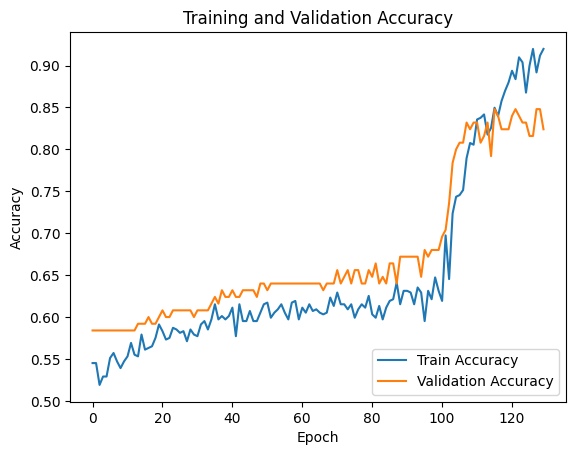

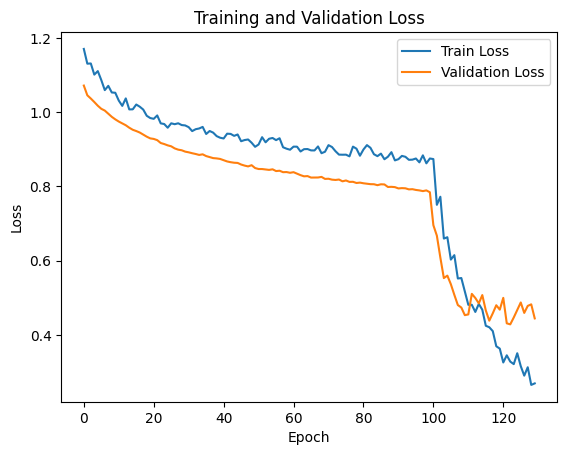

In [ ]:
# CS5331/CS4331 You should Impliment this part

# Now, let’s fix the problem with the previous model. Most models in the last task were overfitting (training accuracy got to 100% so quickly, and validation accuracy started to decrease).
# Fix that problem without changing the batch size, number of iterations, or learning rate.
# Any avoiding overfitting can be used. Just keep the parameters in Table 3 the same.

# Here few steps that you could follow

# import libraries
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Parameters
NUM_LABELS = 3
BATCH_SIZE = 16
HEIGHT = 224
WIDTH = 224
N_CHANNEL = 3
NUM_EPOCH = 100
LR = 0.0001
INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)

# Initialize data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(imgs_train)  # Assuming imgs_train is your training data

# Load the pretrained VGG16 model without the top layers and include ImageNet weights
base_model = VGG16(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')

# Freeze the base layers initially so that they don't get trained
base_model.trainable = False

# Build the model on top of VGG16, with reduced dense layers
model = models.Sequential([
    base_model,  # Pre-trained VGG16 model as feature extractor
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling2D
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Dense layer with L2 regularization
    layers.Dropout(0.4),  # Dropout for overfitting prevention
    layers.Dense(NUM_LABELS, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks to prevent overfitting and adjust the learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(datagen.flow(imgs_train, labels_train, batch_size=BATCH_SIZE),
                    epochs=NUM_EPOCH,
                    validation_data=(imgs_val, labels_val),
                    callbacks=[early_stopping, lr_scheduler])

# Unfreeze the base model layers for fine-tuning
base_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=optimizers.Adam(learning_rate=LR / 10),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model for a few more epochs
fine_tune_epochs = 30
history_fine = model.fit(datagen.flow(imgs_train, labels_train, batch_size=BATCH_SIZE),
                         epochs=fine_tune_epochs,
                         validation_data=(imgs_val, labels_val),
                         callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(imgs_test, labels_test)
print(f'Test accuracy: {test_acc}')

# Plot accuracy over epochs
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the trained model
model.save('vgg16_finetuned_model.h5')